imports

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

load the dataset

In [2]:
X, y = fetch_openml(data_id= 529, return_X_y=True)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


run preliminary data analysis on it

In [3]:
features = ['RIDGE','NUB','CRACK','WEIGHT']
df = pd.DataFrame(X, columns=features)
df['species'] = y

# Check the number of samples and features
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(df.columns) - 1}") # subtract one for the target variable

# Check the ranges and scales of the features
print("Feature ranges and scales:")
print(df.describe())

# Check the variance of the features
print("Feature variances:")
print(df.var())

Number of samples: 3848
Number of features: 4
Feature ranges and scales:
             RIDGE          NUB        CRACK       WEIGHT      species
count  3848.000000  3848.000000  3848.000000  3848.000000  3848.000000
mean     -0.003637     0.000160     0.003103     0.004237     0.000166
std       6.398237     5.186311     7.875199    10.043092     3.144395
min     -23.283900   -16.393500   -31.413000   -34.035200   -12.039100
25%      -3.983725    -3.757625    -5.453275    -7.018650    -2.132450
50%      -0.163850    -0.231700    -0.056150    -0.149350    -0.030450
75%       4.647150     3.750525     5.661125     6.799800     2.028625
max      21.406600    17.258300    30.317800    35.802800    10.867300
Feature variances:
RIDGE       40.937431
NUB         26.897817
CRACK       62.018757
WEIGHT     100.863690
species      9.887217
dtype: float64


Use sklearn function test train split to split the data to test-set and train-set, for
each test-size ratio r ∈ [0.1, 0.2, 0.3, ..., 0.9], and use skleran LinearRegression to train
a linear regressor model on the train-set and evaluate the accuracy on the test-set. Use
matplotlib.pyplot to plot the mean absolute error of each r (using r as x axis and
MSE as y axis)

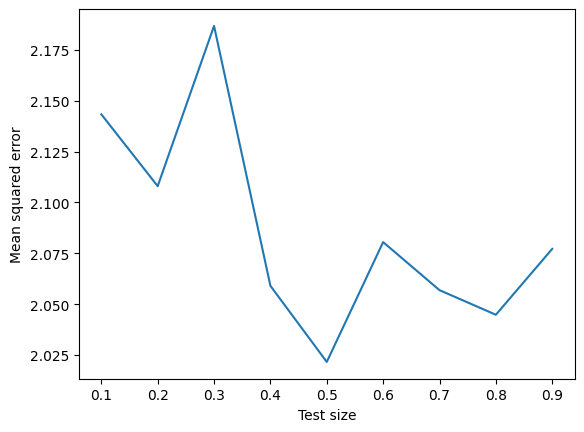

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mse_score = []

for test_size in test_sizes:
    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    # init the logistic regression model
    model = LinearRegression()
    # train the model
    model.fit(X_train, y_train)
    # calculate the model's score on the test set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_score.append(mse)

# plot the results
plt.plot(test_sizes, mse_score)
plt.xlabel('Test size')
plt.ylabel('Mean squared error')
plt.show()


Run a na¨ıve k-features selection algorithm (use mean absolute error instead of accuracy)
for k = 2 and k = 3 prints the results.

In [6]:
from itertools import combinations
from tqdm import tqdm


def k_feature_select(X_train, X_test, y_train, y_test, k):
    best_features = None
    # Initialize best_score to infinity instead of zero
    best_score = float('inf')
    num_combinations = int(len(list(combinations(range(X_train.shape[1]), k))))
    with tqdm(total=num_combinations) as pbar:
        for comb in combinations(range(X_train.shape[1]), k):
            # get the mse score for the current combination
            model = LinearRegression()
            model.fit(X_train[:, comb], y_train)
            # Add missing prediction step
            y_pred = model.predict(X_test[:, comb])
            mse = mean_squared_error(y_test, y_pred)
            if mse < best_score:
                best_score = mse
                best_features = comb
            pbar.update(1)
    return best_features, best_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
best_features, best_score = k_feature_select(X_train,X_test,y_train,y_test,2)


print("best values for k =2")
print("best features:  ",[features[i] for i in best_features])
print("best MSE: " ,best_score)


best_features, best_score = k_feature_select(X_train,X_test,y_train,y_test,3)


print("best values for k =3")
print("best features:  ",[features[i] for i in best_features])
print("best MSE: " ,best_score)


100%|██████████| 6/6 [00:00<00:00, 323.38it/s]


best values for k =2
best features:   ['RIDGE', 'WEIGHT']
best MSE:  3.2276174973553715


100%|██████████| 4/4 [00:00<00:00, 265.41it/s]

best values for k =3
best features:   ['RIDGE', 'NUB', 'WEIGHT']
best MSE:  2.1069480399268
